In [17]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [19]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [20]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

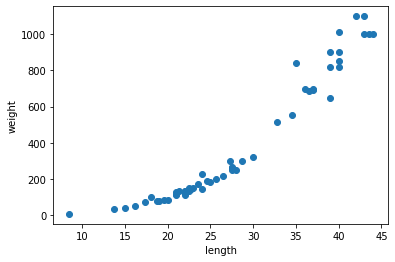

In [21]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()


In [22]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn.n_neighbors = 3
kn.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [23]:
kn.score(test_input, test_target)

0.9746459963987609

In [26]:
kn.predict(np.array([[50]]))

array([1033.33333333])

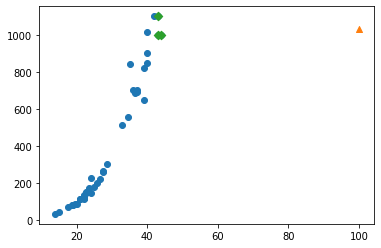

In [32]:
distances, indices = kn.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter([[100]], kn.predict([[100]]), marker='^')
plt.scatter(train_input[indices], train_target[indices], marker='D')
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [34]:
lr.score(test_input, test_target)

0.8247503123313558

In [35]:
lr.predict([[50]])

array([1241.83860323])

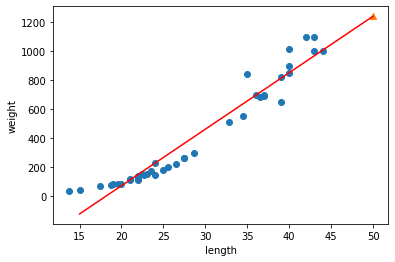

In [37]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_], color='red')
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
train_poly = np.column_stack((train_input, train_input ** 2))
test_poly = np.column_stack((test_input, test_input ** 2))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [48]:
new_lr = LinearRegression()
new_lr.fit(train_poly, train_target)

LinearRegression()

In [49]:
new_lr.predict([[50, 50**2]])

array([1573.98423528])

In [50]:
print(new_lr.coef_, new_lr.intercept_)

[-21.55792498   1.01433211] 116.05021078278384


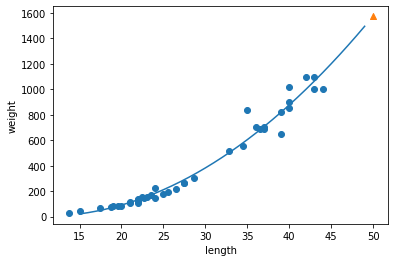

In [55]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, new_lr.coef_[1] * point ** 2 + new_lr.coef_[0] * point + new_lr.intercept_)

plt.scatter(50, new_lr.predict([[50, 50**2]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [58]:
print(new_lr.score(train_poly, train_target))
print(new_lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
